<a href="https://colab.research.google.com/github/hiomgupta/SPII_dialysis/blob/main/Comsol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

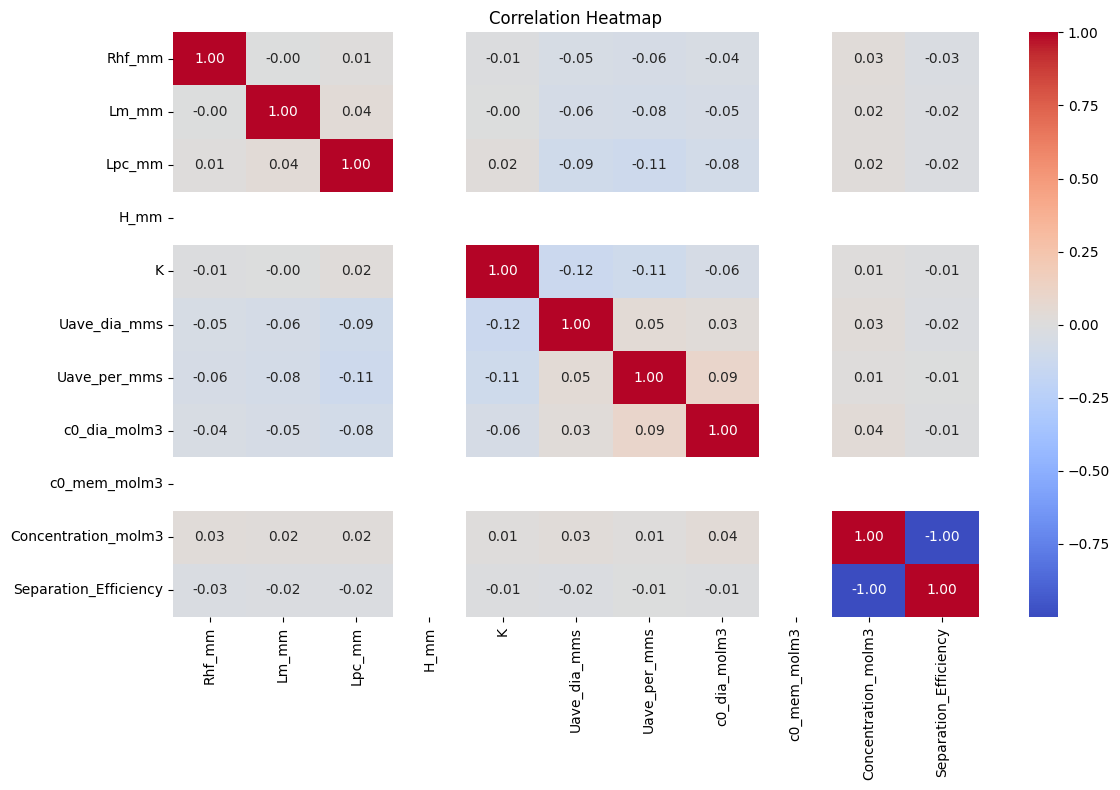

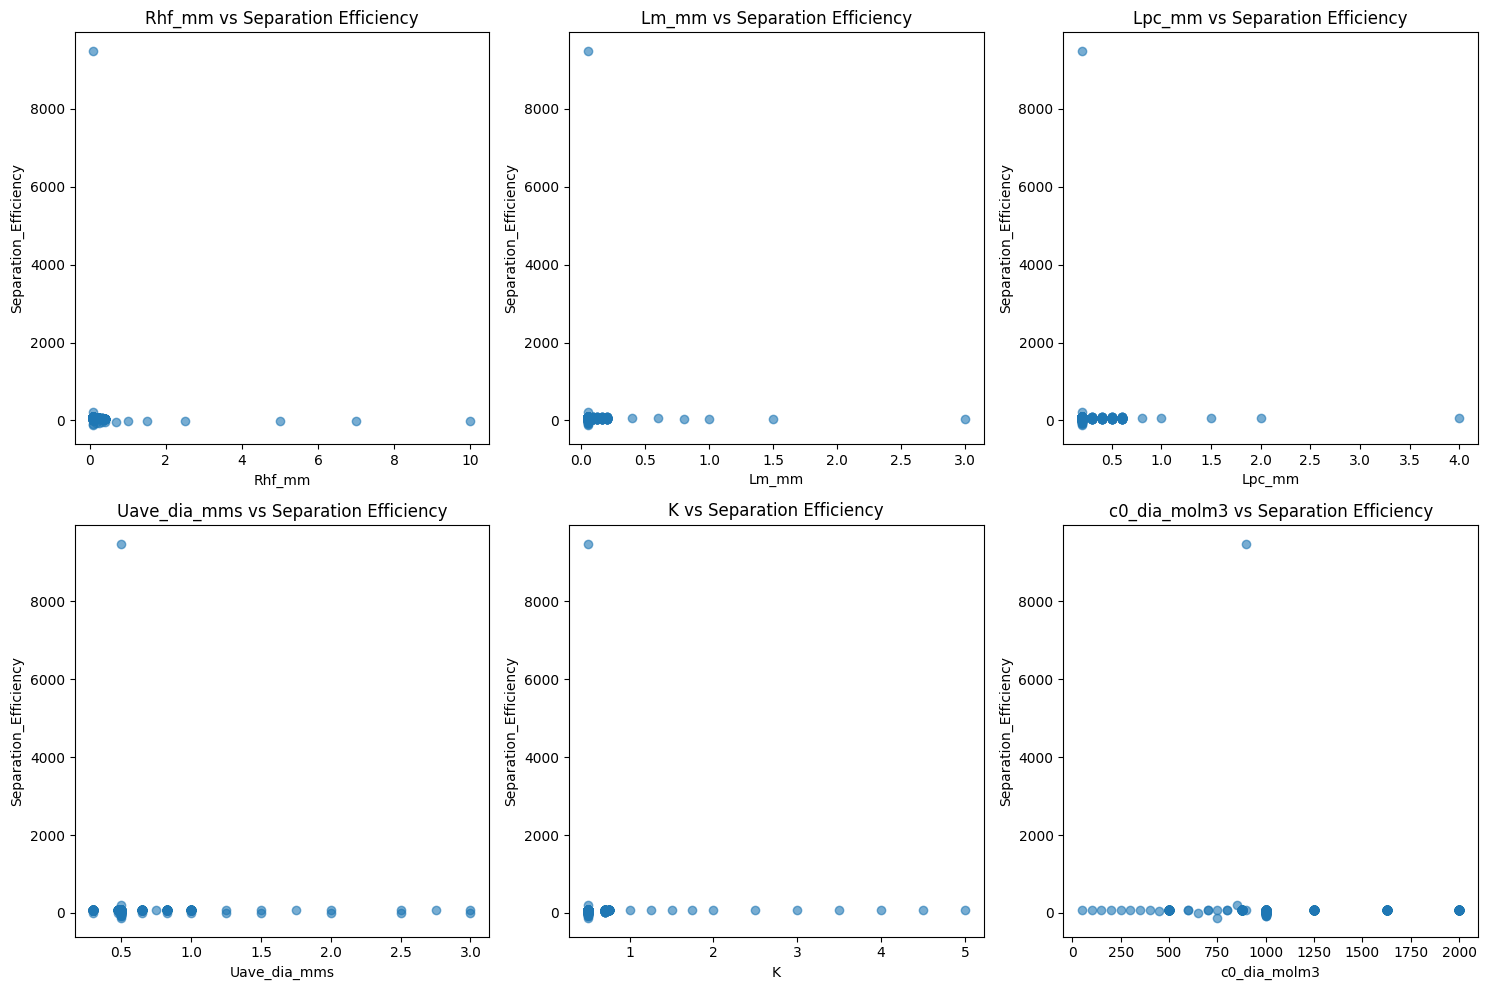

R² Score: 0.56
RMSE: 19.32


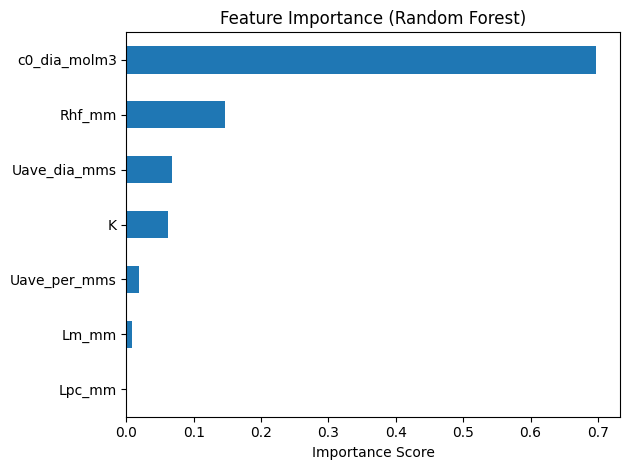

In [ ]:
# ⬇️ Install required packages (if not already)
!pip install pandas matplotlib seaborn scikit-learn

# 📦 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# 📁 Load your CSV data
url = "/content/collected data - Comsol SP II Project - Sheet1.csv"
df = pd.read_csv(url)

# 🛠 Rename for convenience
df.columns = [
    "Rhf_mm", "Lm_mm", "Lpc_mm", "H_mm", "K",
    "Uave_dia_mms", "Uave_per_mms", "c0_dia_molm3", "c0_mem_molm3",
    "Concentration_molm3", "Separation_Efficiency"
]

# 📊 Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 📈 Scatter plots
key_vars = ["Rhf_mm", "Lm_mm", "Lpc_mm", "Uave_dia_mms", "K", "c0_dia_molm3"]
plt.figure(figsize=(15, 10))
for i, var in enumerate(key_vars):
    plt.subplot(2, 3, i+1)
    plt.scatter(df[var], df["Separation_Efficiency"], alpha=0.6)
    plt.xlabel(var)
    plt.ylabel("Separation_Efficiency")
    plt.title(f"{var} vs Separation Efficiency")
plt.tight_layout()
plt.show()

# 🤖 Model Training: Random Forest
X = df[["Rhf_mm", "Lm_mm", "Lpc_mm", "K", "Uave_dia_mms", "Uave_per_mms", "c0_dia_molm3"]]
y = df["Separation_Efficiency"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

# 🔍 Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
importances.plot(kind='barh', title='Feature Importance (Random Forest)')
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


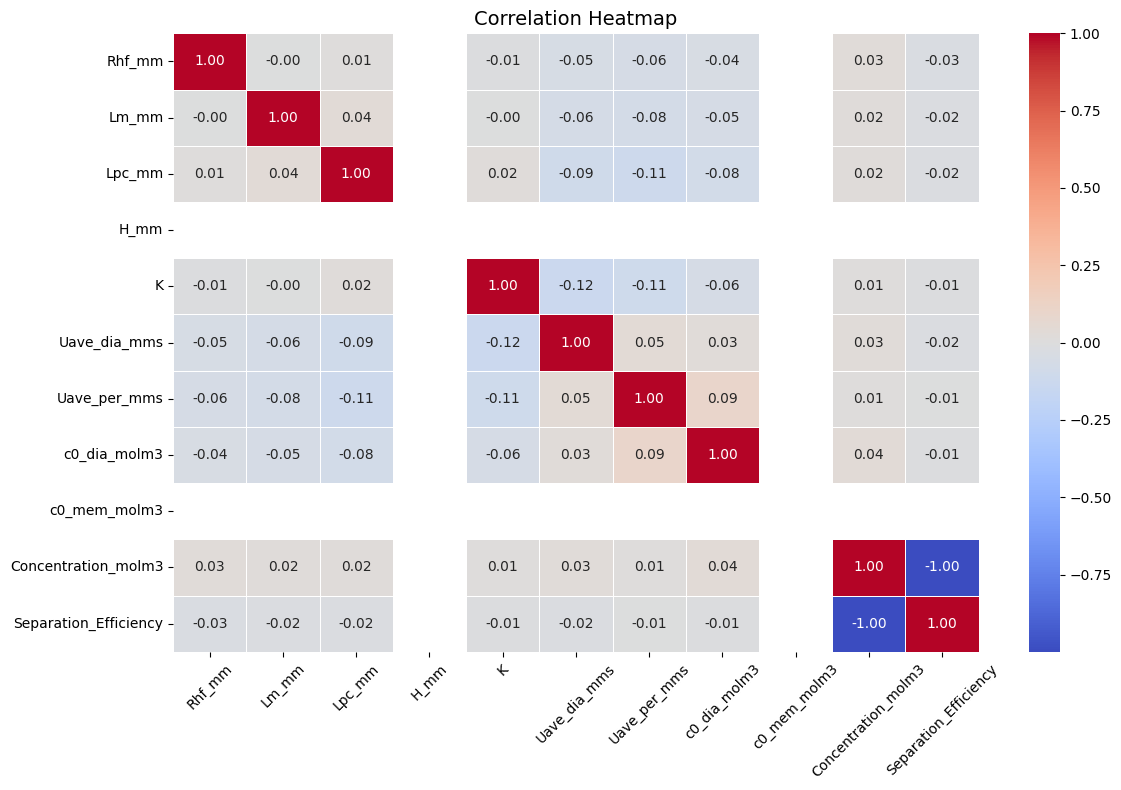

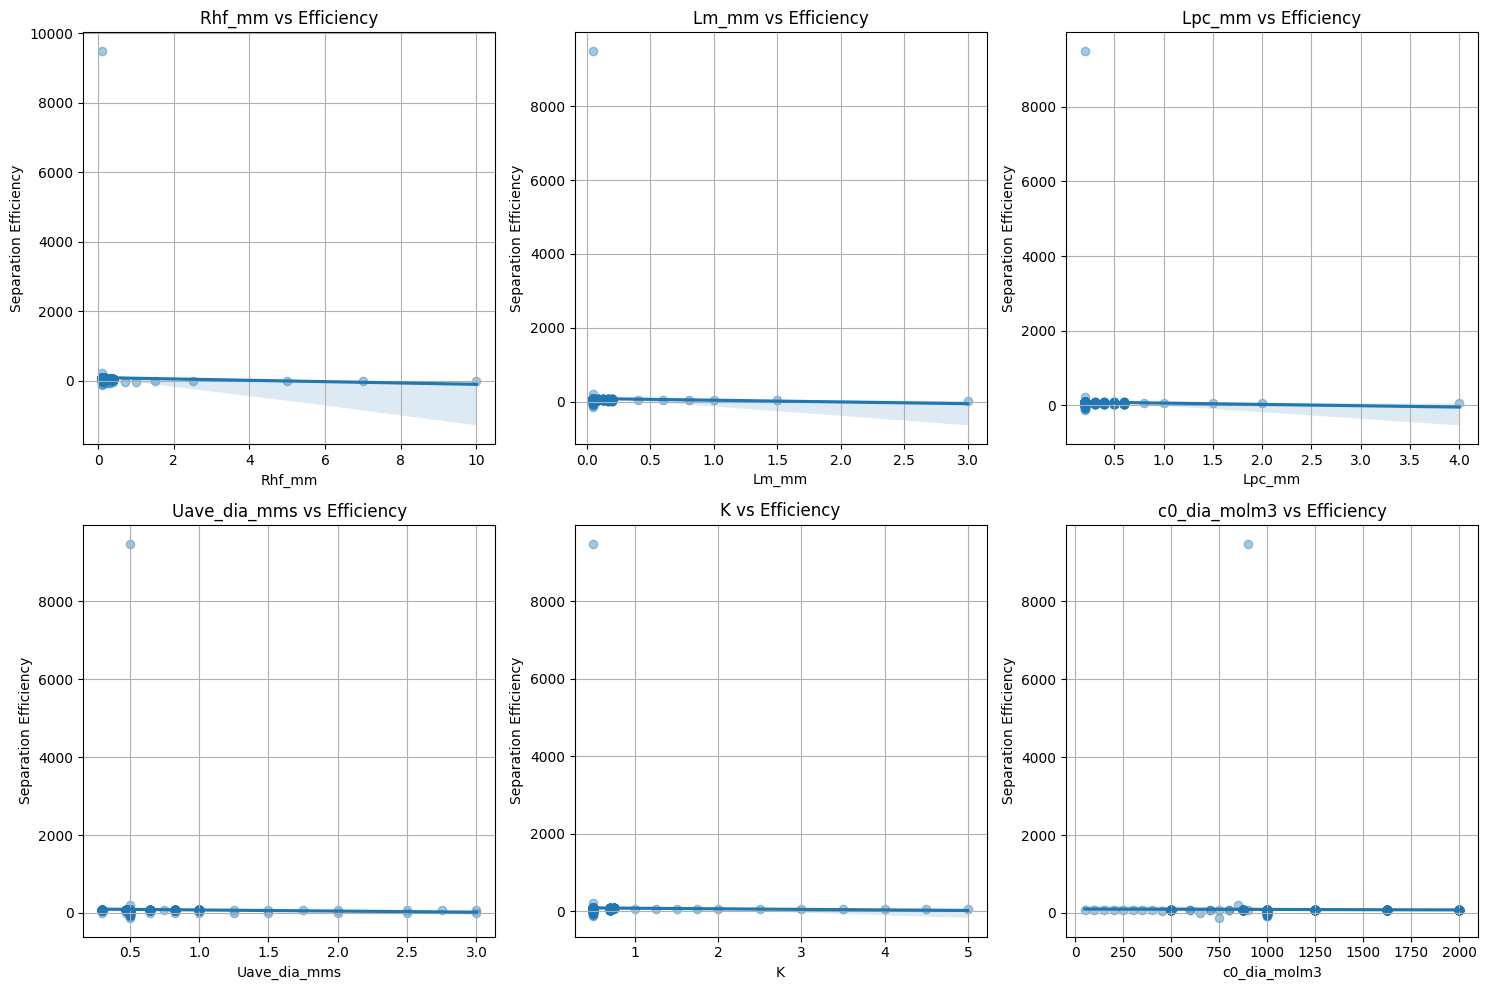

Random Forest R²: 0.56
Random Forest RMSE: 19.32


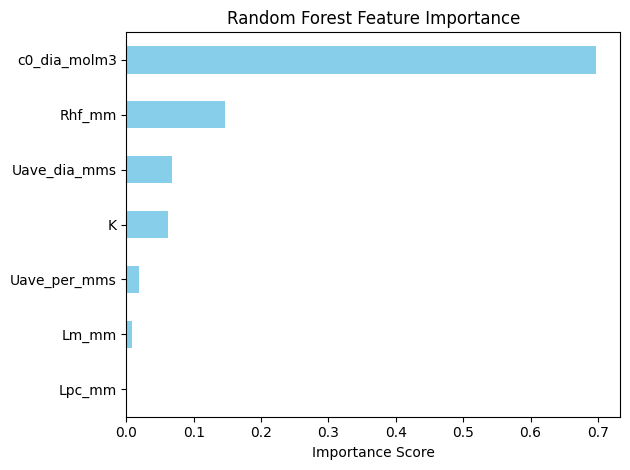

XGBoost R²: 0.60
XGBoost RMSE: 18.41


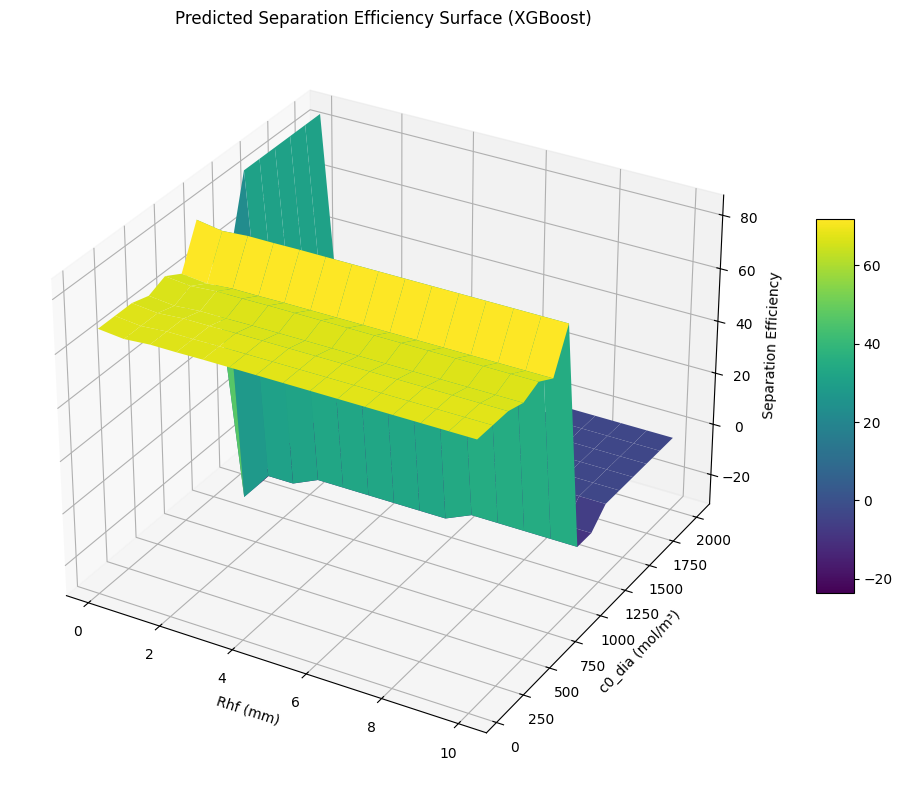

In [ ]:
# 📦 Install required packages
!pip install xgboost seaborn scikit-learn matplotlib pandas --quiet

# 📁 Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# 📄 Load dataset
url = '/content/collected data - Comsol SP II Project - Sheet1.csv'
df = pd.read_csv(url)

# ✅ Rename columns for clarity
df.columns = [
    "Rhf_mm", "Lm_mm", "Lpc_mm", "H_mm", "K",
    "Uave_dia_mms", "Uave_per_mms", "c0_dia_molm3", "c0_mem_molm3",
    "Concentration_molm3", "Separation_Efficiency"
]

# 🔍 Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📈 Scatter plots
key_vars = ["Rhf_mm", "Lm_mm", "Lpc_mm", "Uave_dia_mms", "K", "c0_dia_molm3"]
plt.figure(figsize=(15, 10))
for i, var in enumerate(key_vars):
    plt.subplot(2, 3, i+1)
    sns.regplot(data=df, x=var, y="Separation_Efficiency", scatter_kws={"alpha": 0.4})
    plt.xlabel(var)
    plt.ylabel("Separation Efficiency")
    plt.title(f"{var} vs Efficiency")
    plt.grid(True)
plt.tight_layout()
plt.show()

# 🔁 Train-test split
X = df[["Rhf_mm", "Lm_mm", "Lpc_mm", "K", "Uave_dia_mms", "Uave_per_mms", "c0_dia_molm3"]]
y = df["Separation_Efficiency"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌳 Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print(f"Random Forest R²: {r2_score(y_test, rf_pred):.2f}")
print(f"Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred)):.2f}")

# 🎯 Feature importance
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values()
importances.plot(kind='barh', color='skyblue')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# 🚀 Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)
print(f"XGBoost R²: {r2_score(y_test, xgb_pred):.2f}")
print(f"XGBoost RMSE: {np.sqrt(mean_squared_error(y_test, xgb_pred)):.2f}")

# 🌐 3D Surface Plot: Rhf vs c0_dia
rhf_vals = np.linspace(df["Rhf_mm"].min(), df["Rhf_mm"].max(), 15)
c0_vals = np.linspace(df["c0_dia_molm3"].min(), df["c0_dia_molm3"].max(), 15)
Rhf_grid, C0_grid = np.meshgrid(rhf_vals, c0_vals)

grid_df = pd.DataFrame({
    "Rhf_mm": Rhf_grid.ravel(),
    "Lm_mm": df["Lm_mm"].mean(),
    "Lpc_mm": df["Lpc_mm"].mean(),
    "K": df["K"].mean(),
    "Uave_dia_mms": df["Uave_dia_mms"].mean(),
    "Uave_per_mms": df["Uave_per_mms"].mean(),
    "c0_dia_molm3": C0_grid.ravel()
})

pred_eff = xgb_model.predict(grid_df)
Eff_grid = pred_eff.reshape(Rhf_grid.shape)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Rhf_grid, C0_grid, Eff_grid, cmap=cm.viridis, edgecolor='none')
ax.set_xlabel('Rhf (mm)')
ax.set_ylabel('c0_dia (mol/m³)')
ax.set_zlabel('Separation Efficiency')
ax.set_title('Predicted Separation Efficiency Surface (XGBoost)')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.tight_layout()
plt.show()


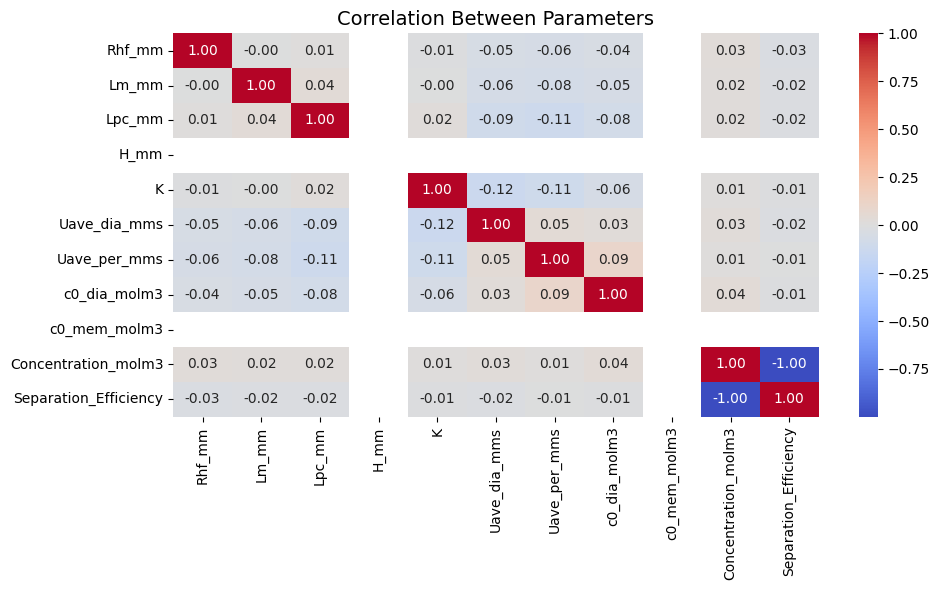

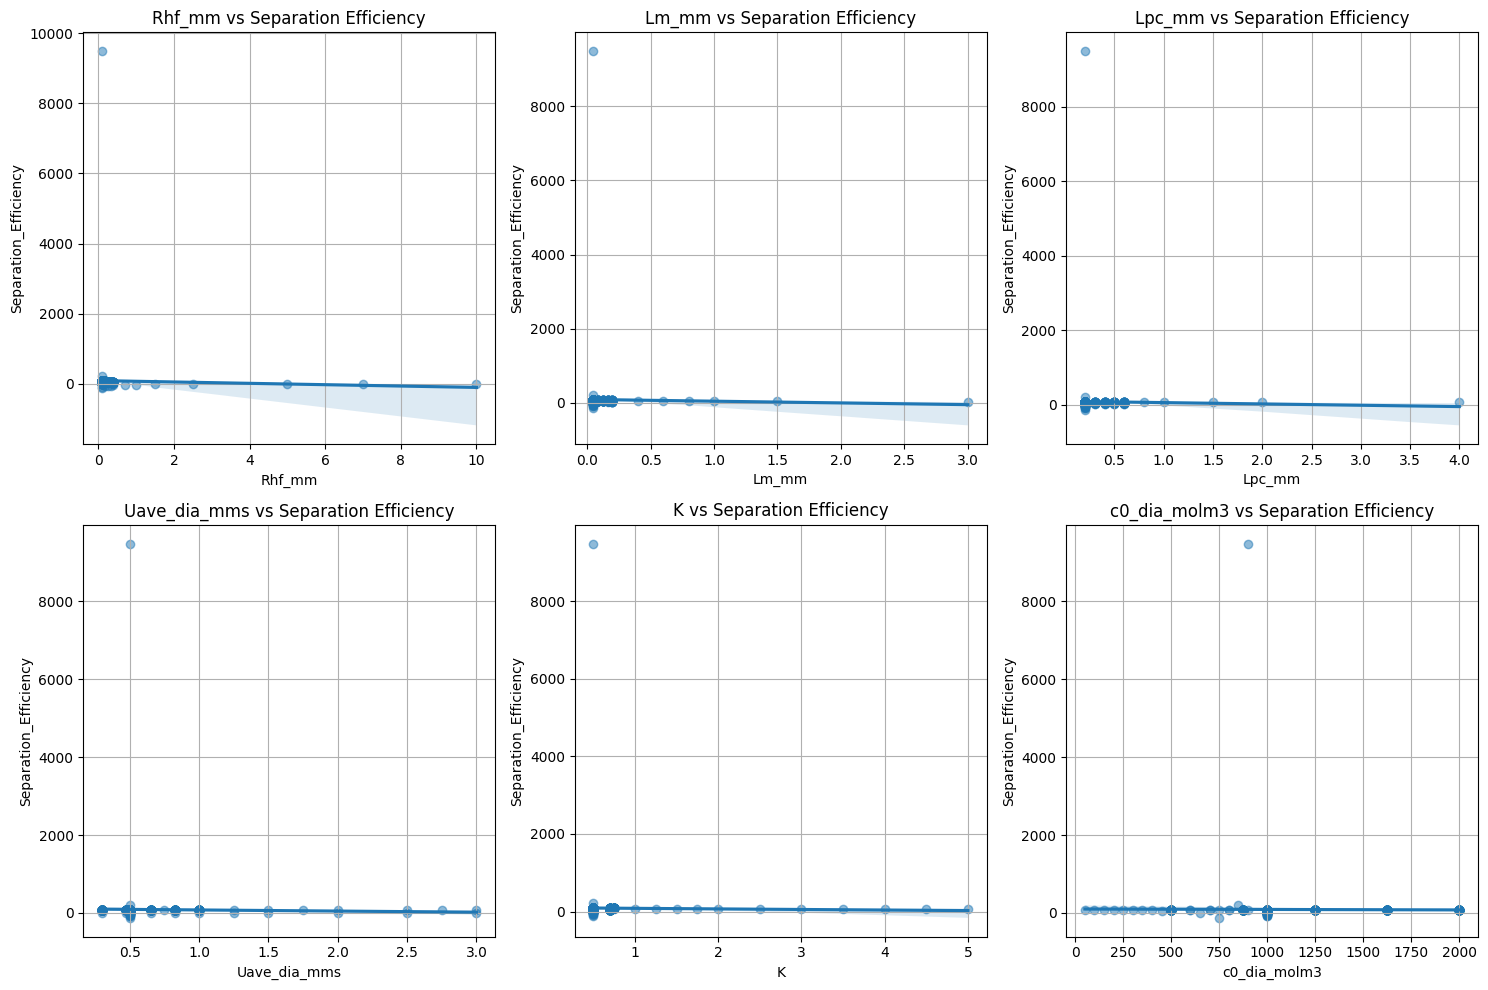

XGBoost R²: 0.60
XGBoost RMSE: 18.41


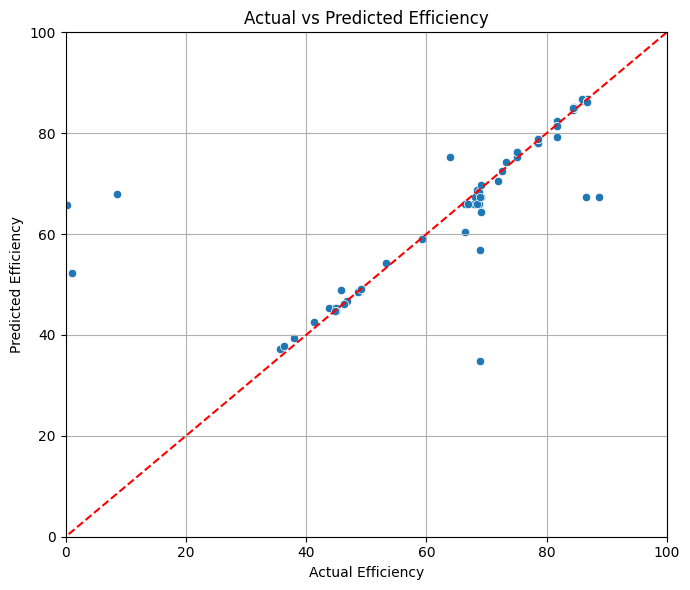

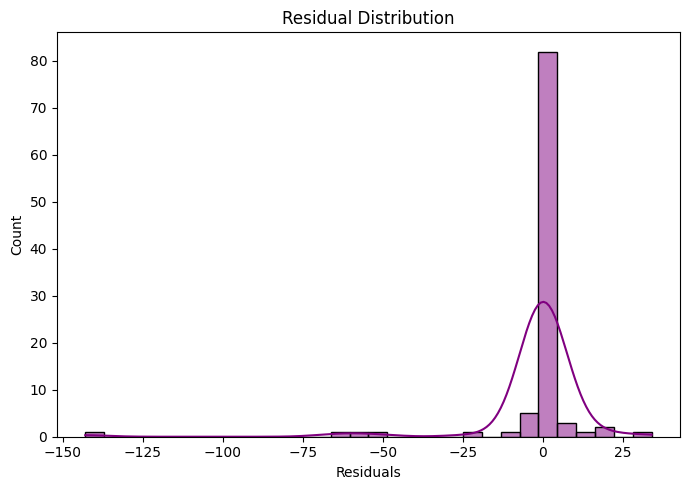

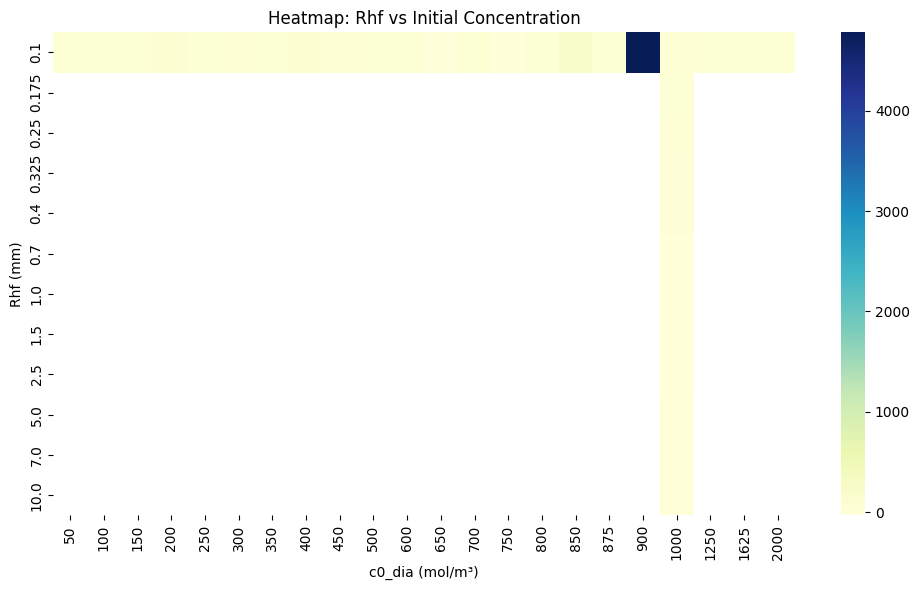

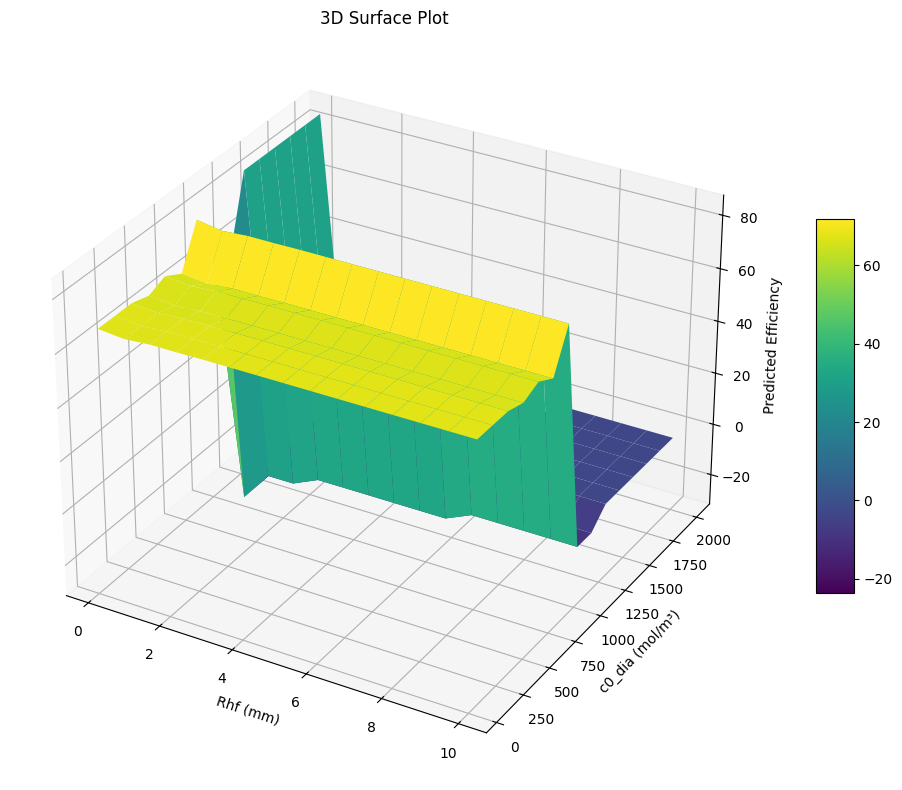

In [ ]:
# 📦 Install dependencies
!pip install xgboost seaborn matplotlib scikit-learn pandas --quiet

# 📁 Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# 📂 Load data
url = '/content/collected data - Comsol SP II Project - Sheet1.csv'
df = pd.read_csv(url)

df.columns = ["Rhf_mm", "Lm_mm", "Lpc_mm", "H_mm", "K", "Uave_dia_mms", "Uave_per_mms",
              "c0_dia_molm3", "c0_mem_molm3", "Concentration_molm3", "Separation_Efficiency"]

# 📊 Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Parameters", fontsize=14)
plt.tight_layout()
plt.show()

# 📈 Scatter Plot Grid
key_vars = ["Rhf_mm", "Lm_mm", "Lpc_mm", "Uave_dia_mms", "K", "c0_dia_molm3"]
plt.figure(figsize=(15, 10))
for i, var in enumerate(key_vars):
    plt.subplot(2, 3, i+1)
    sns.regplot(data=df, x=var, y="Separation_Efficiency", scatter_kws={"alpha": 0.5})
    plt.title(f"{var} vs Separation Efficiency")
    plt.grid(True)
plt.tight_layout()
plt.show()

# 🤖 Model Training: XGBoost
X = df[["Rhf_mm", "Lm_mm", "Lpc_mm", "K", "Uave_dia_mms", "Uave_per_mms", "c0_dia_molm3"]]
y = df["Separation_Efficiency"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print(f"XGBoost R²: {r2_score(y_test, y_pred):.2f}")
print(f"XGBoost RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

# 📌 Prediction vs Actual Plot
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlim(0, 100)
plt.ylim(0, 100)


plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Efficiency")
plt.ylabel("Predicted Efficiency")
plt.title("Actual vs Predicted Efficiency")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📉 Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(7, 5))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()

# 🔥 Heatmap: Rhf vs c0_dia
pivot_table = df.pivot_table(values="Separation_Efficiency", index="Rhf_mm", columns="c0_dia_molm3", aggfunc="mean")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="YlGnBu")
plt.title("Heatmap: Rhf vs Initial Concentration")
plt.xlabel("c0_dia (mol/m³)")
plt.ylabel("Rhf (mm)")
plt.tight_layout()
plt.show()

# 🌐 3D Surface: Rhf and c0_dia vs Efficiency
rhf_vals = np.linspace(df["Rhf_mm"].min(), df["Rhf_mm"].max(), 15)
c0_vals = np.linspace(df["c0_dia_molm3"].min(), df["c0_dia_molm3"].max(), 15)
Rhf_grid, C0_grid = np.meshgrid(rhf_vals, c0_vals)

grid_df = pd.DataFrame({
    "Rhf_mm": Rhf_grid.ravel(),
    "Lm_mm": df["Lm_mm"].mean(),
    "Lpc_mm": df["Lpc_mm"].mean(),
    "K": df["K"].mean(),
    "Uave_dia_mms": df["Uave_dia_mms"].mean(),
    "Uave_per_mms": df["Uave_per_mms"].mean(),
    "c0_dia_molm3": C0_grid.ravel()
})

eff_pred = xgb_model.predict(grid_df)
Eff_grid = eff_pred.reshape(Rhf_grid.shape)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Rhf_grid, C0_grid, Eff_grid, cmap=cm.viridis, edgecolor='none')
ax.set_xlabel("Rhf (mm)")
ax.set_ylabel("c0_dia (mol/m³)")
ax.set_zlabel("Predicted Efficiency")
ax.set_title("3D Surface Plot")
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.tight_layout()
plt.show()


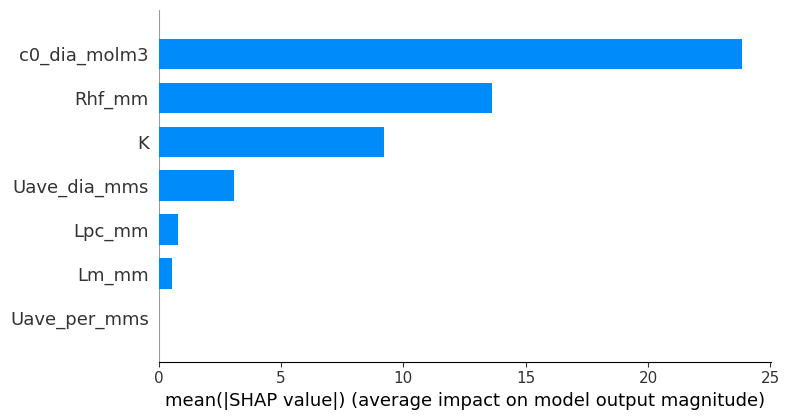

In [ ]:
!pip install shap

import shap

# Explain model
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")
